In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [44]:
urls = ['https://www.eldiarioar.com/politica/capitanich-no-descarto-gobierne-utilice-decretos-si-no-avanzan-sesiones-extraordinarias-congreso_1_9873916.html',
        'https://www.eldiarioar.com/politica/control-precios-moyano-busca-sumar-grabois-piqueteros-super-costa-aval-massa_1_9871199.html',
        'https://www.eldiarioar.com/politica/alberto-fernandez-planteaban-apocalipsis-economia-crece_1_9871174.html',
        'https://www.eldiarioar.com/politica/ahorro-2500-millones-baja-150-mil-planes-ira-obra-publica-realizan-organizaciones-sociales_1_9871132.html',
        'https://www.eldiarioar.com/politica/carrio-denunciara-alberto-fernandez-massa-tombolini-grupos-parapoliciales-controlar-precios_1_9870620.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/invitacion-david-bowie-estrella-porno-apuros_129_9842796.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/crujido-90-ecos-balances-rotos_129_9828875.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/fiesta-oda-viajes-inventados_129_9817802.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/fragmentos-amor-salvaje-infierno-rejas_129_9798132.html',
        'https://www.eldiarioar.com/sociedad/mil-lianas/palabra-ano-mano-dios-reves_129_9774404.html',
        'https://www.eldiarioar.com/sociedad/alerta-amarilla-altas-temperaturas-continua-calor-agobiante-once-provincias-caba_1_9872401.html']
        

In [45]:
urls[0]

'https://www.eldiarioar.com/politica/capitanich-no-descarto-gobierne-utilice-decretos-si-no-avanzan-sesiones-extraordinarias-congreso_1_9873916.html'

In [46]:
r = requests.get(urls[0])

In [47]:
soup = BeautifulSoup(r.content, 'html.parser')

In [48]:
#print (soup.prettify())
soup.find('p', class_='article-text').text

'\n        El gobernador del Chaco, Jorge Capitanich, analizó este martes que “si existe un bloqueo institucional de parte de Juntos por el Cambio (JxC)” en el Congreso, el presidente Alberto Fernández “tiene las facultades” como para poder actuar, y consideró como “prioritario discutir una reforma del sistema judicial”.\n    '

In [49]:
noticias = {}
for url in urls:
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    parrafos = soup.find_all('p', class_='article-text')
    texto = ''
    for parrafo in parrafos:
        texto = texto + parrafo.text
    noticias[url] = texto

In [50]:
textos = pd.DataFrame([])
textos['url'] = noticias.keys()
textos['texto'] = textos['url'].apply(lambda x: noticias[x])
textos['Categoria'] = ['Politica','Politica','Politica','Politica','Politica','Sociedad','Sociedad','Sociedad','Sociedad','Sociedad','Clima']

In [51]:
textos

,url,texto,Categoria
0,https://www.eldiarioar.com/politica/capitanich...,"\n El gobernador del Chaco, Jorge Capit...",Politica
1,https://www.eldiarioar.com/politica/control-pr...,\nEl operativo de control de Precios Justos su...,Politica
2,https://www.eldiarioar.com/politica/alberto-fe...,\n El presidente Alberto Fernández aseg...,Politica
3,https://www.eldiarioar.com/politica/ahorro-250...,\n El Gobierno confirmó esta tarde que ...,Politica
4,https://www.eldiarioar.com/politica/carrio-den...,"\nElisa “Lilita” Carrió, titular de la Coalici...",Politica
5,https://www.eldiarioar.com/sociedad/mil-lianas...,\n Un triángulo: David Byrne (el ex Tal...,Sociedad
6,https://www.eldiarioar.com/sociedad/mil-lianas...,\n“Donde no hay ecos el silencio es tan horrib...,Sociedad
7,https://www.eldiarioar.com/sociedad/mil-lianas...,\nUno. “El problema de la fiesta es el fin de ...,Sociedad
8,https://www.eldiarioar.com/sociedad/mil-lianas...,\nNo sé por qué no puedes hacer bien las cosas...,Sociedad
9,https://www.eldiarioar.com/sociedad/mil-lianas...,\nUno. Diciembre es el mes de la hipérbole (de...,Sociedad


In [52]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 


In [53]:
spanishStemmer=SnowballStemmer("spanish")
stopwords_sp = stopwords.words('spanish')

# si no hacemos esto y usamos directo stopwords_sp, CountVectorizer devuelve un warning
stopwords_sp_stem = [spanishStemmer.stem(x) for x in stopwords_sp]

vectorizer = CountVectorizer(stop_words = stopwords_sp_stem, lowercase = True, strip_accents = 'unicode');

vectorizer.fit(textos['texto']);
print('Vocabulario:\n',vectorizer.vocabulary_) # vocabulario del corpus con la frecuencia de cada término


Vocabulario:
 {'gobernador': 1718, 'chaco': 650, 'jorge': 2060, 'capitanich': 581, 'analizo': 261, 'martes': 2259, 'existe': 1511, 'bloqueo': 479, 'institucional': 1981, 'parte': 2656, 'juntos': 2075, 'cambio': 549, 'jxc': 2082, 'congreso': 817, 'presidente': 2910, 'alberto': 203, 'fernandez': 1582, 'tiene': 3618, 'facultades': 1550, 'como': 758, 'para': 2636, 'poder': 2833, 'actuar': 125, 'considero': 835, 'prioritario': 2936, 'discutir': 1203, 'reforma': 3143, 'sistema': 3433, 'judicial': 2065, 'consensos': 831, 'aseguro': 374, 'cuenta': 969, 'herramientas': 1807, 'intervenir': 2016, 'contar': 847, 'respaldo': 3207, 'popular': 2856, 'pido': 2775, 'oposicion': 2591, 'dejen': 1051, 'mentir': 2312, 'tiempos': 3617, 'muchos': 2417, 'dirigentes': 1196, 'muestran': 2421, 'paladines': 2631, 'etica': 1490, 'tienen': 3619, 'doble': 1229, 'discurso': 1201, 'unico': 3741, 'hacen': 1769, 'herir': 1801, 'muerte': 2419, 'instituciones': 1982, 'democracia': 1060, 'concretamente': 801, 'chaqueno': 6

In [54]:
countvectorizer_encoding = vectorizer.transform(textos['texto'])
print('\n Transformamos los textos a una matriz esparsa:',type(countvectorizer_encoding))

data = pd.DataFrame(countvectorizer_encoding.todense(), 
             columns = vectorizer.get_feature_names_out()) # Usamos el método .todense() para ver la matriz completa


 Transformamos los textos a una matriz esparsa: <class 'scipy.sparse.csr.csr_matrix'>


In [55]:
data['juntos']

0     1
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: juntos, dtype: int64

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

Tfidf_encoding=TfidfTransformer().fit_transform(countvectorizer_encoding);

pd.DataFrame(Tfidf_encoding.todense(),columns=vectorizer.get_feature_names_out())

,10,100,1080,12,120,150,1500,154,1740,1790,...,yendo,york,youtube,zabaleta,zapatillas,zapatos,zapping,zonas,zumbido,zurro
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.072446,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.037995,0.037995,0.00000,0.037995,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.037995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.045108,0.022554,0.000000,0.000000,0.000000,0.022554
6,0.025776,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.025776,0.000000,0.000000,0.000000,0.000000,0.000000,0.022033,0.000000
7,0.000000,0.020587,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.024085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025949,0.000000,0.022180,0.000000
9,0.000000,0.095094,0.02225,0.000000,0.000000,0.000000,0.02225,0.000000,0.02225,0.02225,...,0.02225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


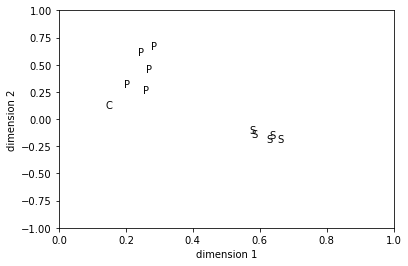

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2);
P = svd.fit_transform(Tfidf_encoding)

plt.figure()

for i in range(textos.shape[0]):
    plt.annotate(textos['Categoria'].iloc[i][0],P[i])
    
    

plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.axis([0, 1, -1, 1])
plt.show()

In [58]:
import numpy as np

In [59]:
n = 30
# coeficientes (pesos) de los términos en cada una de las dos dimensiones
comp1,comp2 = svd.components_ 

# los ordenamos de menor a mayor y nos quedamos con los índices de sus posiciones en el array
indices_1=np.argsort(comp1)
indices_2=np.argsort(comp2)

# invertimos para que queden ordenados de mayor a menor
indices_1=indices_1[::-1] 
indices_2=indices_2[::-1]

# Evaluamos los términos en estas posiciones
print('Dimension 1:')
print(np.array(vectorizer.get_feature_names_out())[indices_1[:n]])


print('Dimension 2:')
print(np.array(vectorizer.get_feature_names_out())[indices_2][:n])

Dimension 1:
['para' 'como' 'todo' 'aca' 'tiempo' 'sobre' 'hasta' 'dias' 'vez' 'ano'
 '2022' 'vida' 'novela' 'pero' 'hace' 'lopez' 'porque' 'puede' 'libro'
 'siempre' 'cada' 'desde' 'momentos' 'leer' 'poco' 'todos' 'david'
 'aunque' 'argentina' 'escritora']
Dimension 2:
['precios' 'programa' 'gobierno' 'moyano' 'controlar' 'ciencia' 'larreta'
 'supermercados' 'tombolini' 'barrios' 'comercio' 'camioneros' 'justos'
 'operativo' 'estado' 'tecnologia' 'social' 'beneficiarios' 'sociales'
 'carrio' 'argentinos' 'economia' 'paz' 'contra' 'dirigente' 'control'
 'potenciar' 'personas' 'organizacion' 'aseguro']
